In [2]:
import numpy as np
import plotly.plotly as py
from __future__ import division # division
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
from plotly.offline import plot # import plotly to graph distributions
import plotly.graph_objs as go
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

import pandas as pd
df = pd.read_csv('./YouthTobaccoSurveyData.csv')

In [48]:
# generate a csv file of current smoker
df = df[np.isfinite(df['Data_Value'])]         # drop rows with no attribute "data_value"
smokingstat_df = df[df['MeasureDesc'] == "Smoking Status"]
current_smoker_df = smokingstat_df[smokingstat_df['Response'] == 'Current']
#current_smoker_df.to_csv('current_smoker.csv')

In [49]:
# current smokers who want to quit and attempt to quit
df_quit = df[df['MeasureDesc'] == 'Percent of Current Smokers Who Want to Quit']
df_attempt_quit = df[df['MeasureDesc'] == 'Quit Attempt in Past Year Among Current Cigarette Smokers']

### Linear model fitting current smokers throughout the pase decade

In [31]:
current_smoker_df['Data_Value'] = current_smoker_df['Data_Value'] / 100


/Users/stacyzeng/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
lm = smf.ols(formula='Data_Value ~ YEAR + Gender + Education', data=current_smoker_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     988.7
Date:                Mon, 06 Mar 2017   Prob (F-statistic):               0.00
Time:                        20:29:45   Log-Likelihood:                 2198.1
No. Observations:                1257   AIC:                            -4386.
Df Residuals:                    1252   BIC:                            -4360.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     16.6829      0.491     33.967      0.000      15.719      17.646
Gender[T.Male]                 0.0104      0.003      3.566      0.000       0.005       0.016
Gender[T.Overall]              0.0057      0.003      1.950      0.051   -3.34e-05       0.011
Education[T.Middle School]    -0.1299      0.002    -54.428      0.000      -0.135      -0.125
YEAR                          -0.0082      0.000    -33.567      0.000      -0.009      -0.008
==============================================================================
Omnibus:                      129.754   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.267
Skew:                          -0.481   Prob(JB):                     4.12e-96
Kurtosis:                       5.732   Cond. No.                     8.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Create predictions using this model
current_smoker_df['mult_preds'] = lm.predict()

/Users/stacyzeng/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



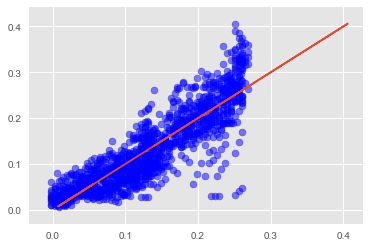

In [37]:
# Compare predictions to observations
plt.scatter(current_smoker_df.mult_preds, current_smoker_df.Data_Value, color = 'blue', alpha = 0.5)
plt.plot(current_smoker_df.Data_Value, current_smoker_df.Data_Value)
plt.show()

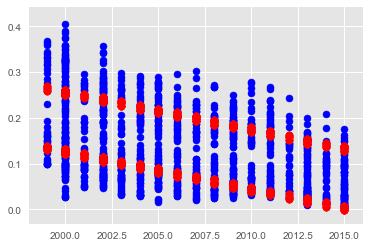

In [39]:
# Visually compare predictions over year
plt.scatter(current_smoker_df.YEAR, current_smoker_df.Data_Value, color = 'blue')
plt.scatter(current_smoker_df.YEAR, current_smoker_df.mult_preds, color='red')
plt.show()

### Linear model fitting smokers attempt to quit

In [51]:
df_quit['Data_Value'] = df_quit['Data_Value'] / 100

/Users/stacyzeng/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
lm_quit = smf.ols(formula='Data_Value ~ YEAR + Gender + Education', data=df_quit).fit()
lm_quit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     91.66
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           7.07e-66
Time:                        20:45:18   Log-Likelihood:                 5607.8
No. Observations:                 950   AIC:                        -1.121e+04
Df Residuals:                     945   BIC:                        -1.118e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1715      0.009     18.079      0.000       0.153       0.190
Gender[T.Male]                -0.0004   5.52e-05     -6.988      0.000      -0.000      -0.000
Gender[T.Overall]             -0.0002   5.23e-05     -3.297      0.001      -0.000   -6.98e-05
Education[T.Middle School]    -0.0003    4.5e-05     -6.435      0.000      -0.000      -0.000
YEAR                       -8.279e-05   4.73e-06    -17.510      0.000   -9.21e-05   -7.35e-05
==============================================================================
Omnibus:                       18.009   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.953
Skew:                           0.124   Prob(JB):                     3.13e-07
Kurtosis:                       3.834   Cond. No.                     8.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Create predictions using this model
df_quit['mult_preds'] = lm_quit.predict()

/Users/stacyzeng/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



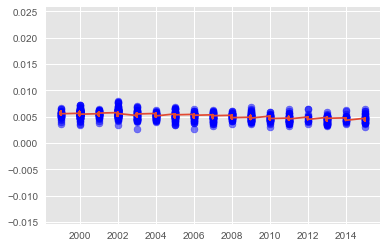

In [55]:
# Compare predictions to observations
plt.scatter(df_quit.YEAR, df_quit.Data_Value, color = 'blue', alpha = 0.5)
plt.plot(df_quit.YEAR, df_quit.mult_preds)
plt.show()